<a href="https://colab.research.google.com/github/abigailpt/pa-datmin-c2-6/blob/main/Supervised6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**C2 - Kelompok 6**
###Anggota :
#####Josia Pardosi 2109116115
#####Abigail Patandianan 2109116120
#####Nabila Aulia Azzahra 2109116111

#**Breast Cancer Survival (Supervised)**

Supervised merupakan sebuah proses pengelompokkan data – data yang dimana telah memiliki label dan akan dimasukkan/dikelompokkan berdasarkan labelnya, juga algoritma yang terdapat pada supervised bertujuan untuk memperkirakan atau memprediksi fungsi pada bidang pemetaan sehingga ketika ada variable input (X) kita pun dapat memprediksi variable output (Y). Dan proses untuk mendapatkan labelnya tentu harus melakukan training/uji coba terlebih dahulu. 

Pengelompokan data pada supervised disebut dengan classification atau klasifikasi, yang mana klasifikasi sendiri merupakan aktivitas proses pengkatagorian sekumpulan data-data menjadi kedalam kelas-kelas yang dapat dilakukan pada data yang terstruktur maupun tidak terstruktur. Proses klasifikasinya sendiri dimulai dengan memprediksikan kelas pada titik data, kemudian kelas-kelas tersebut sering disebut juga sebagai label, target, kategori.

Contoh gambaran dari supervised :    

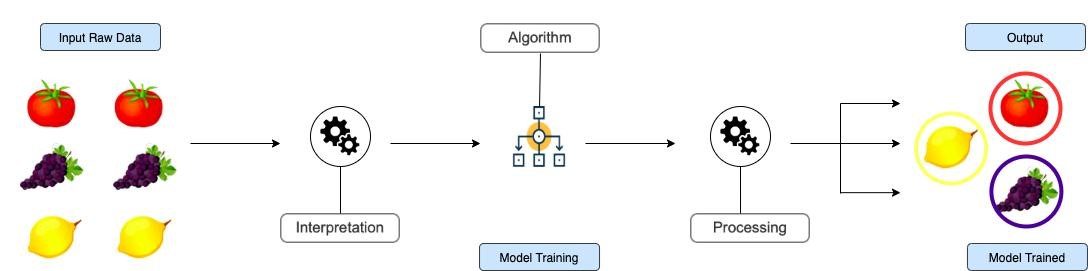

##Analisis

<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

##Business Understanding


https://www.kaggle.com/datasets/kreeshrajani/breast-cancer-survival-dataset?resource=download 

**Breast Cancer Survival** adalah Dataset yang berisi informasi pasien kanker payudara, termasuk Patient_ID, Age, Gender, dan level ekspresi dari empat protein (Protein1, Protein2, Protein3, Protein4). Dataset ini juga mencakup stadium kanker payudara pasien (Stage_Tumor), Histologi (jenis kanker), status ER, PR, dan HER2, tipe_bedah, Tanggal Pembedahan, Tanggal Kunjungan Terakhir, dan Status Pasien (Hidup/Meninggal).

Informasi ini dapat digunakan untuk menganalisis hubungan antara tingkat ekspresi protein, stadium kanker, dan hasil pasien. Ini juga dapat digunakan untuk memahami dampak dari berbagai jenis operasi terhadap kelangsungan hidup pasien dan untuk mengidentifikasi faktor risiko potensial untuk perkembangan kanker payudara.

##Data Understanding

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
def null_ratio(df, limit=-1):
  percent_missing = df.isnull().sum() * 100 / len(df)
  df_result = pd.DataFrame({
      "filled":df.notnull().sum(),
      "N null":df.isna().sum(),
      "null_ratio(%)": percent_missing,
      }
  )
  nr =  df_result.sort_values("null_ratio(%)",ascending=False)
  return nr[nr["null_ratio(%)"] > limit]

Fungsi dari function ini adalah untuk menampilkan informasi mengenai data yang hilang atau null dalam suatu dataframe.

###collect intial data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/nabilazh/dataset/main/breast_cancer_survival.csv") 

In [4]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


In [5]:
df.head() #Untuk menampilkan lima baris pertama dari suatu dataframe.

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


df.head() Menampilkan data frame 5 baris data pertama

In [6]:
df.tail()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
329,59,FEMALE,0.024598,1.40050,0.024751,0.28032,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.52387,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.85786,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.10782,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive
333,66,FEMALE,0.286380,1.39980,0.318830,0.83605,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,04-Feb-19,10-Aug-19,Dead


"df.tail()" berguna untuk melihat data terbaru yang dimasukkan ke dalam dataframe, terutama jika dataframe tersebut terus diperbarui secara real-time. Method ini juga dapat digunakan untuk melakukan validasi dan debugging pada data yang telah diolah, serta memudahkan kita dalam memahami struktur dari data yang disimpan dalam dataframe.

In [7]:
# df1 isinya dataset dengan label target  Alive
df1 = df[df['Patient_Status'] == 'Alive']

# Menampilkan hasil filter
df1

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
5,80,FEMALE,0.466470,2.57970,-1.253700,0.151540,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jun-18,16-Feb-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,52,FEMALE,0.240800,1.73480,0.331090,1.044100,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,12-Oct-19,07-Nov-20,Alive
328,64,FEMALE,0.975800,2.48470,-0.513320,0.666980,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,02-Oct-19,03-Feb-21,Alive
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive


In [8]:
# df10 isinya dataset dengan label target bukan Alive
df10 = df[df['Patient_Status'] != 'Alive']

# Menampilkan hasil filter
df10


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.50732,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
9,62,FEMALE,0.649340,1.81680,0.279260,0.13228,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,20-Jun-19,NaN,NaN
17,63,FEMALE,0.052728,0.72210,-0.308650,-0.53129,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-May-19,26-Dec-19,Dead
18,46,FEMALE,-0.010999,0.86749,0.281570,-0.54588,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,10-Jun-19,NaN,NaN
22,63,FEMALE,0.903140,1.96780,-0.790790,0.96265,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Simple Mastectomy,21-Jan-19,06-Mar-20,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,79,FEMALE,0.978250,1.71050,-0.656300,0.26910,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,05-Apr-19,NaN,Dead
321,50,FEMALE,0.672490,1.27900,-0.321070,-0.11239,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
327,73,FEMALE,0.448570,2.30130,0.011659,0.60686,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,16-May-18,21-Apr-19,Dead
331,54,FEMALE,0.753820,1.64250,-0.332850,0.85786,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead


In [9]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 1 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 79 non-null     int64  
 1   Gender              79 non-null     object 
 2   Protein1            79 non-null     float64
 3   Protein2            79 non-null     float64
 4   Protein3            79 non-null     float64
 5   Protein4            79 non-null     float64
 6   Tumour_Stage        79 non-null     object 
 7   Histology           79 non-null     object 
 8   ER status           79 non-null     object 
 9   PR status           79 non-null     object 
 10  HER2 status         79 non-null     object 
 11  Surgery_type        79 non-null     object 
 12  Date_of_Surgery     79 non-null     object 
 13  Date_of_Last_Visit  62 non-null     object 
 14  Patient_Status      66 non-null     object 
dtypes: float64(4), int64(1), object(10)
memory usage: 9.9+ KB


### Describe Data


In [10]:
# df3 isinya dataset dengan label target female
df3 = df[df['Gender'] == "FEMALE"] 

# Menampilkan hasil filter
df3

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


In [11]:
# df4 isinya dataset dengan label target protein di bawah  0.010815
df4 = df[df['Protein4'] < 0.010815]

# Menampilkan hasil filter
df4

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.04834,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.50732,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.39021,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
7,36,FEMALE,0.469310,1.55260,-0.165240,-0.27599,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,19-Jul-18,30-Jun-19,Alive
8,58,FEMALE,-1.268500,0.10613,1.135200,-0.39492,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,15-Jun-18,16-Dec-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,51,FEMALE,0.090487,-0.63873,2.193400,-0.83843,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,24-Feb-19,05-Dec-20,Alive
321,50,FEMALE,0.672490,1.27900,-0.321070,-0.11239,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
324,90,FEMALE,-1.388200,0.77504,0.290880,-0.92427,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,19-Jul-18,08-Sep-18,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.52387,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [13]:
df.select_dtypes(include=np.number)

,Age,Protein1,Protein2,Protein3,Protein4
0,42,0.952560,2.15000,0.007972,-0.048340
1,54,0.000000,1.38020,-0.498030,-0.507320
2,63,-0.523030,1.76400,-0.370190,0.010815
3,78,-0.876180,0.12943,-0.370380,0.132190
4,42,0.226110,1.74910,-0.543970,-0.390210
...,...,...,...,...,...
329,59,0.024598,1.40050,0.024751,0.280320
330,41,0.100120,-0.46547,0.472370,-0.523870
331,54,0.753820,1.64250,-0.332850,0.857860
332,74,0.972510,1.42680,-0.366570,-0.107820


Untuk memilih hanya kolom-kolom numerik dalam dataframe. Method ini mengambil satu parameter yaitu "include" yang digunakan untuk menentukan tipe data yang ingin dipilih.

###Explore Data

In [14]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


####Visualisasi Comparison

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from collections import Counter
%matplotlib inline

In [16]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


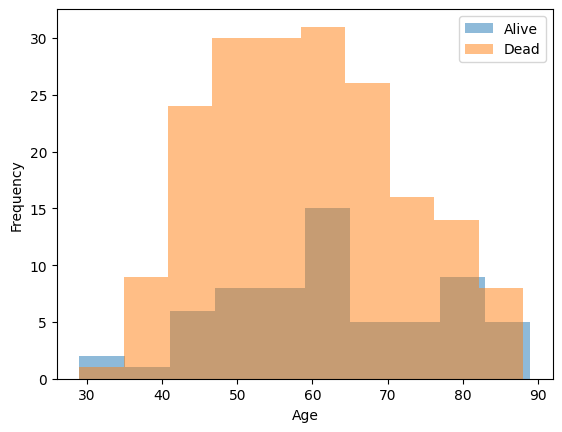

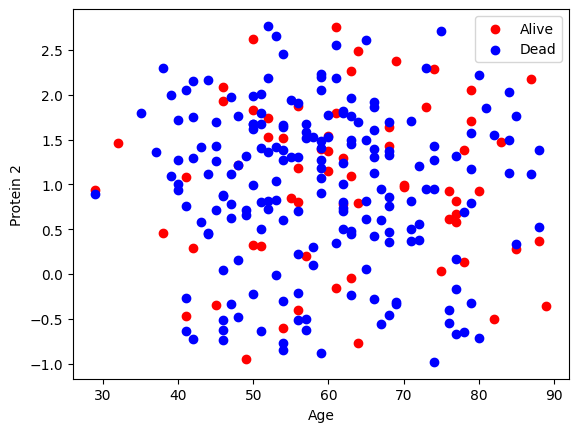

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Memilih subset data untuk Tumour_Stage I dan II
df_A = df[df['Tumour_Stage'] == 'I']
df_D = df[df['Tumour_Stage'] == 'II']

# Menampilkan histogram untuk fitur 'Age' pada kelas I dan II
plt.hist(df_A['Age'], alpha=0.5, label='Alive')
plt.hist(df_D['Age'], alpha=0.5, label='Dead')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Menampilkan scatter plot untuk fitur 'Age' dan 'Protein2' pada kelas I dan II
plt.scatter(df_A['Age'], df_A['Protein2'], color='red', label='Alive')
plt.scatter(df_D['Age'], df_D['Protein2'], color='blue', label='Dead')
plt.xlabel('Age')
plt.ylabel('Protein 2')
plt.legend(loc='upper right')
plt.show()


Implementasi dari data visualization pada pandas dataframe menggunakan matplotlib. dan mengvisualisasikan kolom "Tumor Stage" dan juga "Age"

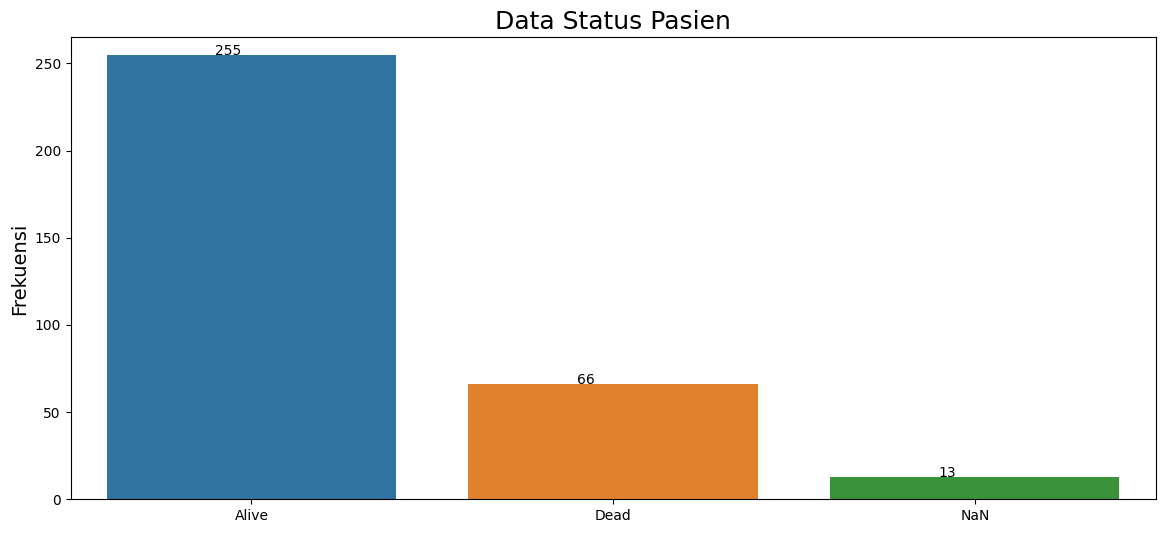

In [18]:
# Membuat subplot dan mengatur ukurannya
fig, ax = plt.subplots(figsize=(14, 6))
max_width = 13

# Mengambil 4 nilai teratas pada kolom 'Patient_Status' dan menghitung frekuensinya
index = df['Patient_Status'].fillna('NaN').value_counts().index[0:4]
count = df['Patient_Status'].fillna('NaN').value_counts()[0:4]

# Membuat bar plot
sns.barplot(x=index, y=count, order=index)
ax.set_title('Data Status Pasien', fontsize=18)
ax.set_xticklabels((textwrap.fill(x, max_width) for x in index), fontsize=10)
for i, count in enumerate(count):
    ax.text(x=i-0.1, y=count+0, s=f"{count}", fontdict=dict(fontsize=10))
ax.set_ylabel('Frekuensi', fontsize=14)
ax.set_ylim(0, df['Patient_Status'].fillna('NaN').value_counts()[0]+10)

# Menampilkan plot
plt.show()

Implementasi dari data visualization pada pandas dataframe menggunakan library seaborn dan matplotlib. Mengambil 4 nilai teratas pada kolom 'Patient_Status' dan menghitung frekuensinya menggunakan method "value_counts()".

####Visualisasi Distribution

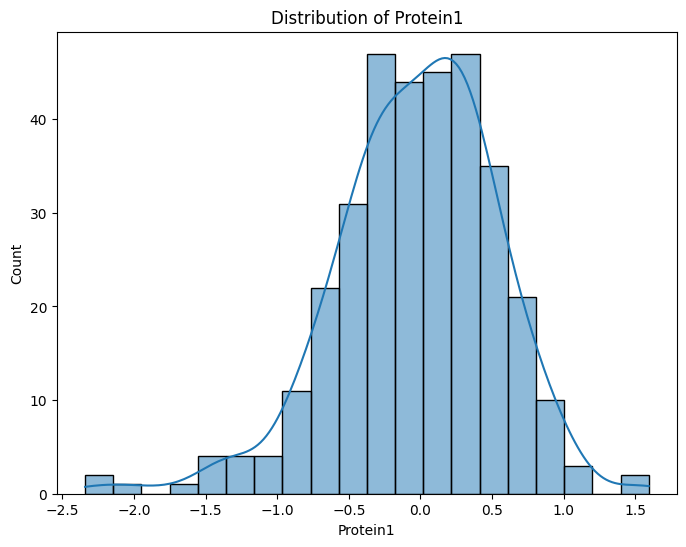

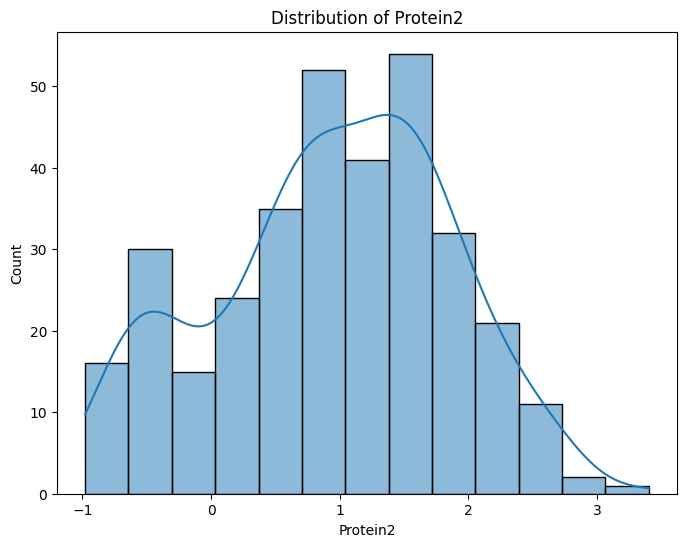

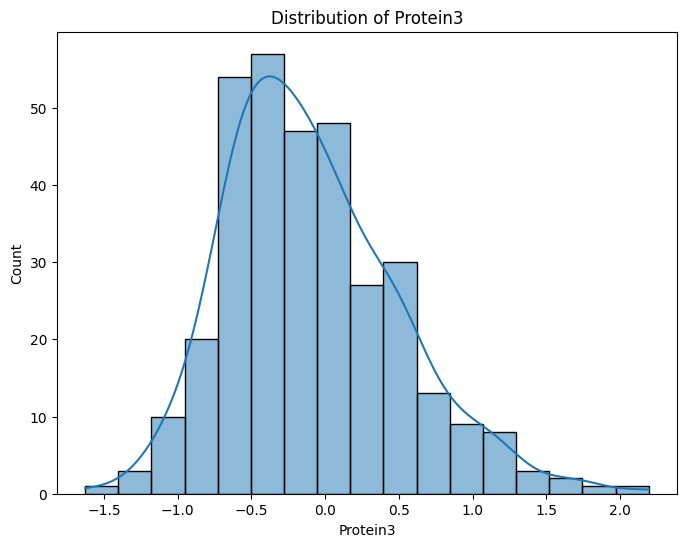

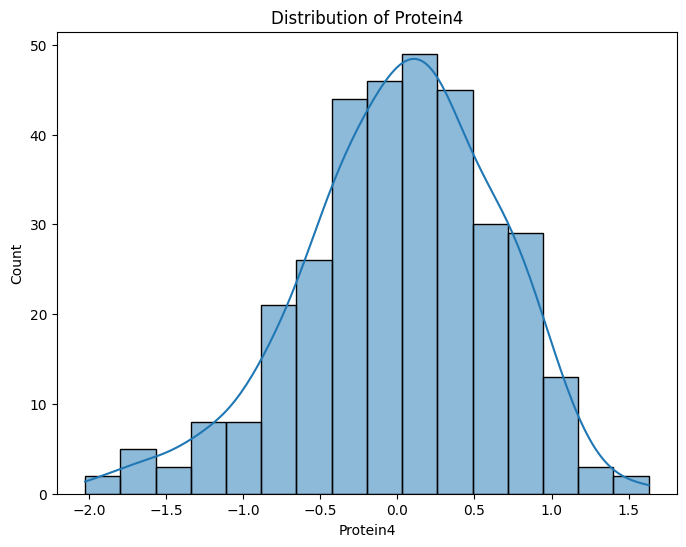

In [19]:
# Memilih beberapa fitur untuk divisualisasikan distribusinya
cols = ['Protein1', 'Protein2', 'Protein3', 'Protein4']

# Menampilkan histogram dan KDE dari setiap fitur
for col in cols:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
    plt.show()

Memvisualisasikan distribusi dari beberapa fitur pada suatu dataset menggunakan histogram dan kernel density estimation (KDE) plot. dengan target 4 kolom ['Protein1', 'Protein2', 'Protein3', 'Protein4']


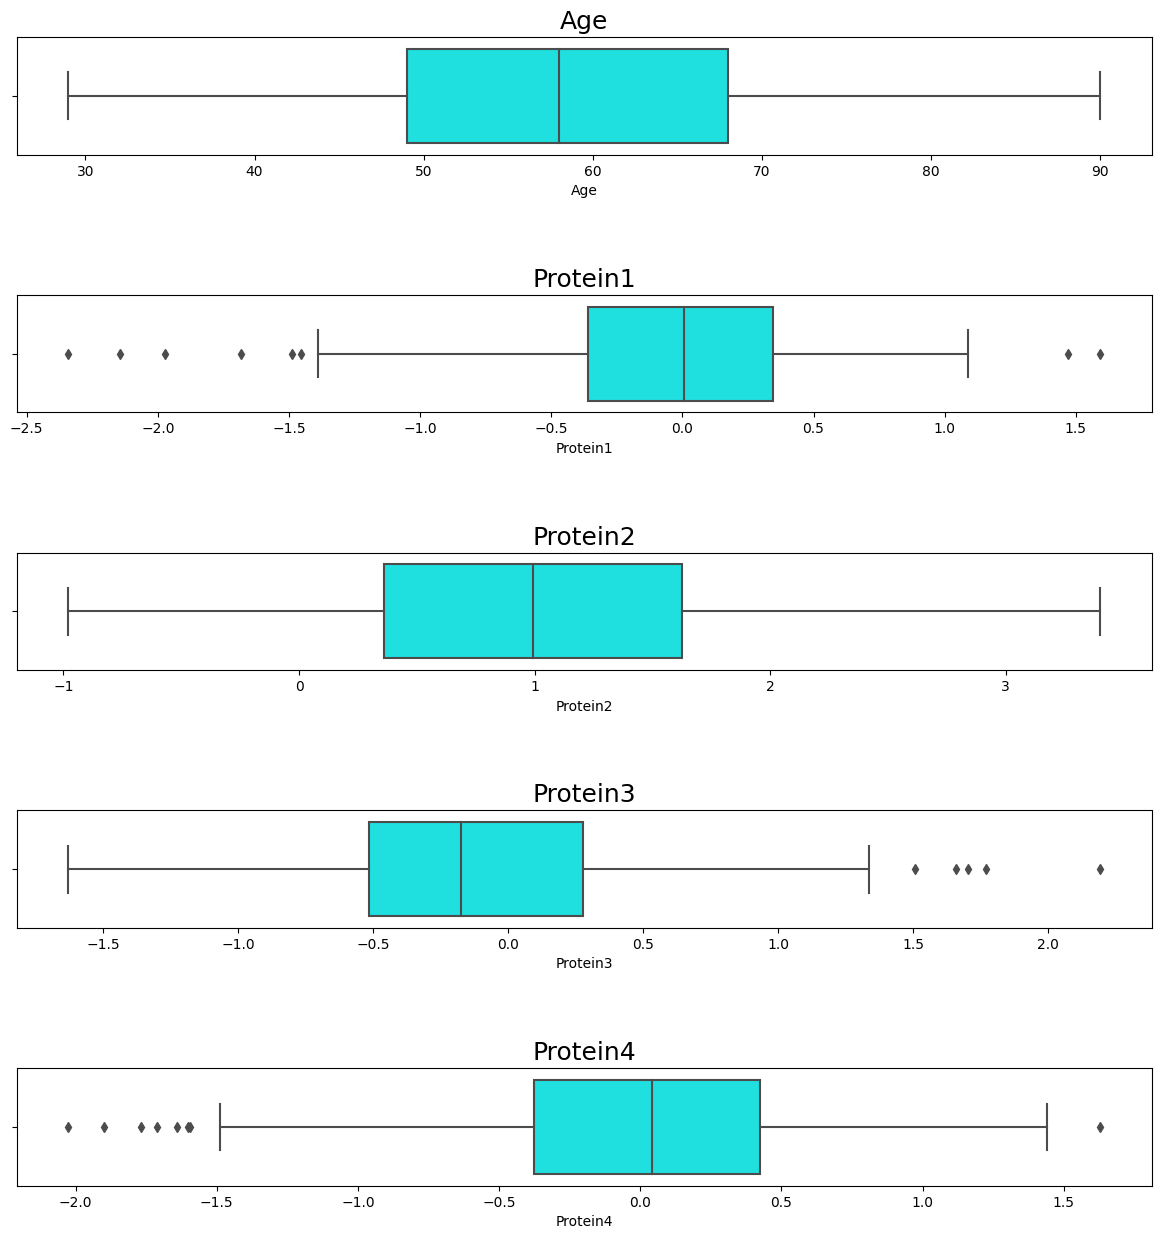

In [20]:
# Memilih beberapa fitur numerik untuk divisualisasikan dengan box plot
num_cols = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']

# Membuat box plot untuk setiap fitur numerik
fig, ax = plt.subplots(len(num_cols), 1, figsize = (14, 14))
fig.tight_layout(pad = 8)

for i, col in enumerate(num_cols):
    sns.boxplot(ax = ax[i], x = df[col], orient = 'h', color = 'aqua')
    ax[i].set_title(col, fontsize = 18)

plt.show()

melakukan visualisasi data numerik dengan menggunakan box plot. dengan target 4 kolom ['Protein1', 'Protein2', 'Protein3', 'Protein4']

<Axes: xlabel='Age', ylabel='Tumour_Stage'>

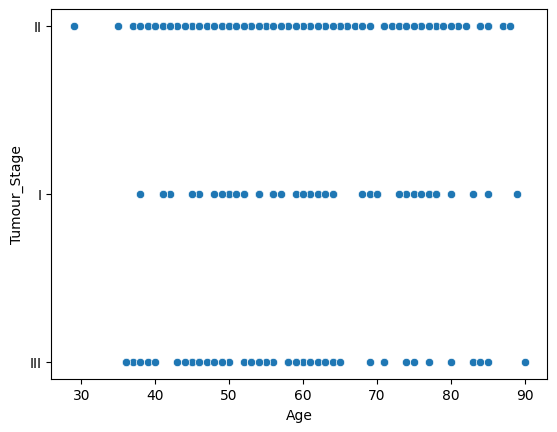

In [21]:
sns.scatterplot(data=df1, x="Age", y="Tumour_Stage")

Membuat scatterplot dengan x = "Age" dan y = "Tumour_Stage"

#### Visualisasi Relationship

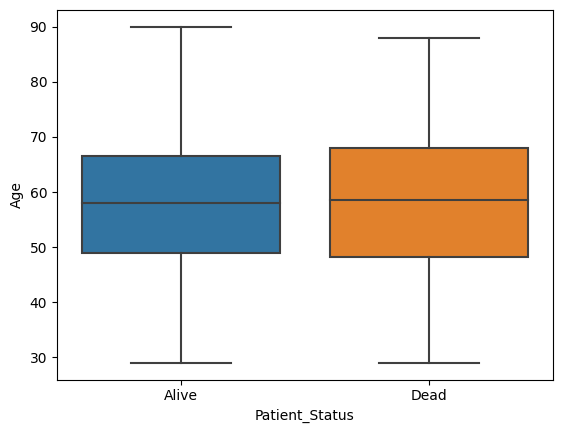

In [22]:
sns.boxplot(x='Patient_Status', y='Age', data=df)
plt.show()

#### Visualisasi Composition

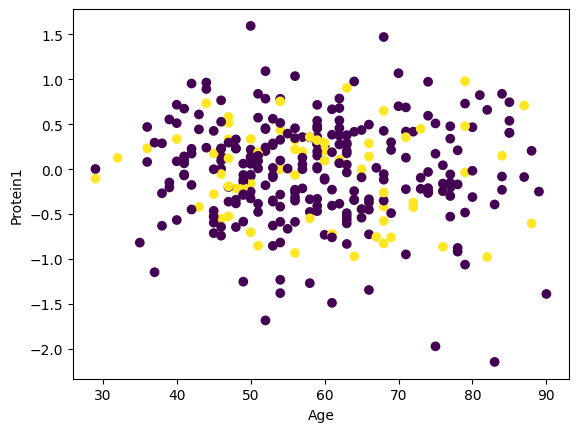

In [23]:
plt.scatter(df['Age'], df['Protein1'], c=df['Patient_Status'].replace({'Alive': 0, 'Dead': 1}))
plt.xlabel('Age')
plt.ylabel('Protein1')
plt.show()


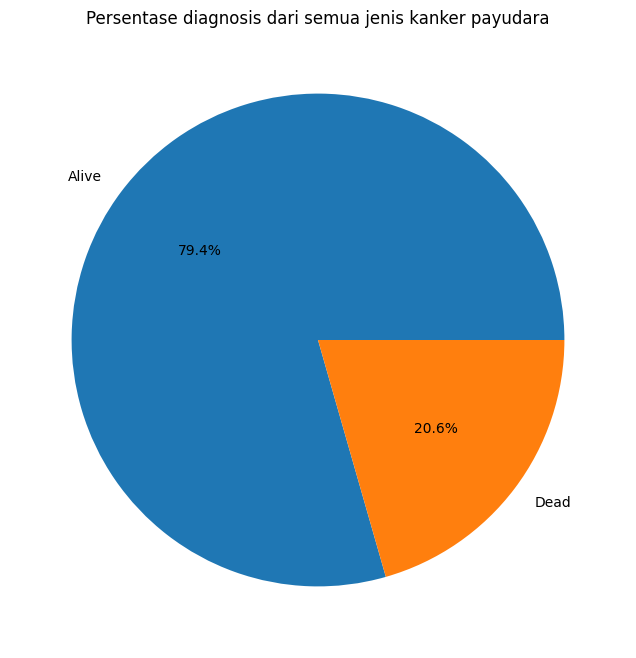

In [24]:
#Calculate count of each Level category
level_count = df['Patient_Status'].value_counts()

#Create pie chart for Level categories
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(level_count, labels=level_count.index, autopct='%1.1f%%')
ax.set_title('Persentase diagnosis dari semua jenis kanker payudara')
plt.show()


####verify data quality

In [25]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64


In [26]:
# cek duplikasi
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [27]:
# Check for outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df3 > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 Age                   0
Date_of_Last_Visit    0
Date_of_Surgery       0
ER status             0
Gender                0
HER2 status           0
Histology             0
PR status             0
Patient_Status        0
Protein1              5
Protein2              0
Protein3              4
Protein4              2
Surgery_type          0
Tumour_Stage          0
dtype: int64


<ipython-input-27-86cd597b7335>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df1.quantile(0.25)
<ipython-input-27-86cd597b7335>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df1.quantile(0.75)
<ipython-input-27-86cd597b7335>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df3 > (Q3 + 1.5 * IQR))).sum()


In [28]:
# Outlier
# Batas atas Q3 + 1.5*IQR
# IQR = Q3-Q1

q3 = df1.Protein1.quantile(0.75)
q1 = df1.Protein1.quantile(0.25)
iqr = q3 - q1
ba = q3 + (1.5*iqr)
bw = q1 - (1.5*iqr)

print(q3,q1,iqr,ba,bw)

0.3556 -0.34595 0.70155 1.407925 -1.398275


In [29]:
print("Data types:\n", df4.dtypes)

Data types:
 Age                     int64
Gender                 object
Protein1              float64
Protein2              float64
Protein3              float64
Protein4              float64
Tumour_Stage           object
Histology              object
ER status              object
PR status              object
HER2 status            object
Surgery_type           object
Date_of_Surgery        object
Date_of_Last_Visit     object
Patient_Status         object
dtype: object


## Data Preparation

### Clean Data

Membuat dataframe baru menjadi df2

In [30]:
df2 = df.copy(deep=True)
df2

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [32]:
df2['Patient_Status'] = df2['Patient_Status'].fillna(0)

for column in df2.columns:
    if df2[column].isnull().values.any():
        print(f"Column {column} contains NaN/null values")
        print(df2[column].isnull().sum())





Column Date_of_Last_Visit contains NaN/null values
17


Mengcek nan/null values

In [33]:
df2.dropna()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


Menghapus null/nan values

##Encoding

In [34]:

df2.Patient_Status = df2.Patient_Status.map({"Alive":0,"Dead":1})
df2["ER status"] = df2["ER status"].map({"Positive":1,"Negative":0})
df2["PR status"] = df2["PR status"].map({"Positive":1,"Negative":0})
df2["HER2 status"] = df2["HER2 status"].map({"Positive":1,"Negative":0})
df2 = df2.drop(columns=["Date_of_Last_Visit"])
df2 = df2.drop(columns=["Date_of_Surgery"])

df100 = df2

df100

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,1,1,0,Other,0.0
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,1,1,0,Other,1.0
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,1,1,0,Lumpectomy,0.0
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,1,1,0,Other,0.0
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,1,1,1,Lumpectomy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,1,1,1,Lumpectomy,0.0
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,1,1,1,Modified Radical Mastectomy,0.0
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,1,1,0,Simple Mastectomy,1.0
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,1,1,0,Lumpectomy,0.0


Mengelola data atau mengubah data dari kategorikal menjadi numerik 

In [35]:
df2 = pd.get_dummies(df2)
df2['Patient_Status'] = df2['Patient_Status'].fillna(0)
df100['Patient_Status'] = df2['Patient_Status'].fillna(0)
df2

,Age,Protein1,Protein2,Protein3,Protein4,ER status,PR status,HER2 status,Patient_Status,Gender_FEMALE,...,Tumour_Stage_I,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,42,0.952560,2.15000,0.007972,-0.048340,1,1,0,0.0,1,...,0,1,0,1,0,0,0,0,1,0
1,54,0.000000,1.38020,-0.498030,-0.507320,1,1,0,1.0,1,...,0,1,0,1,0,0,0,0,1,0
2,63,-0.523030,1.76400,-0.370190,0.010815,1,1,0,0.0,1,...,0,1,0,1,0,0,1,0,0,0
3,78,-0.876180,0.12943,-0.370380,0.132190,1,1,0,0.0,1,...,1,0,0,1,0,0,0,0,1,0
4,42,0.226110,1.74910,-0.543970,-0.390210,1,1,1,0.0,1,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,0.024598,1.40050,0.024751,0.280320,1,1,1,0.0,1,...,0,1,0,1,0,0,1,0,0,0
330,41,0.100120,-0.46547,0.472370,-0.523870,1,1,1,0.0,1,...,1,0,0,1,0,0,0,1,0,0
331,54,0.753820,1.64250,-0.332850,0.857860,1,1,0,1.0,1,...,0,1,0,1,0,0,0,0,0,1
332,74,0.972510,1.42680,-0.366570,-0.107820,1,1,0,0.0,1,...,0,1,0,0,1,0,1,0,0,0


DataFrame df2 diubah dengan menggunakan fungsi pd.get_dummies() untuk mengubah kolom-kolom kategorikal menjadi kolom biner, dengan angka 1 menandakan keberadaan kategori tersebut pada baris tertentu.

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       334 non-null    int64  
 1   Protein1                                  334 non-null    float64
 2   Protein2                                  334 non-null    float64
 3   Protein3                                  334 non-null    float64
 4   Protein4                                  334 non-null    float64
 5   ER status                                 334 non-null    int64  
 6   PR status                                 334 non-null    int64  
 7   HER2 status                               334 non-null    int64  
 8   Patient_Status                            334 non-null    float64
 9   Gender_FEMALE                             334 non-null    uint8  
 10  Gender_MALE                           

In [37]:
df2.isna().sum()

Age                                         0
Protein1                                    0
Protein2                                    0
Protein3                                    0
Protein4                                    0
ER status                                   0
PR status                                   0
HER2 status                                 0
Patient_Status                              0
Gender_FEMALE                               0
Gender_MALE                                 0
Tumour_Stage_I                              0
Tumour_Stage_II                             0
Tumour_Stage_III                            0
Histology_Infiltrating Ductal Carcinoma     0
Histology_Infiltrating Lobular Carcinoma    0
Histology_Mucinous Carcinoma                0
Surgery_type_Lumpectomy                     0
Surgery_type_Modified Radical Mastectomy    0
Surgery_type_Other                          0
Surgery_type_Simple Mastectomy              0
dtype: int64

Untuk melihat missing values

In [38]:
df100.isna().sum()

Age               0
Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
ER status         0
PR status         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64

In [39]:
null_ratio(df2)

,filled,N null,null_ratio(%)
Age,334,0,0.0
Tumour_Stage_I,334,0,0.0
Surgery_type_Other,334,0,0.0
Surgery_type_Modified Radical Mastectomy,334,0,0.0
Surgery_type_Lumpectomy,334,0,0.0
Histology_Mucinous Carcinoma,334,0,0.0
Histology_Infiltrating Lobular Carcinoma,334,0,0.0
Histology_Infiltrating Ductal Carcinoma,334,0,0.0
Tumour_Stage_III,334,0,0.0
Tumour_Stage_II,334,0,0.0


Mendetailkan kolom kolom untuk melihat missing values

### Splitting

Untuk menampilkan 300 baris

In [40]:
df2.sample(300)

,Age,Protein1,Protein2,Protein3,Protein4,ER status,PR status,HER2 status,Patient_Status,Gender_FEMALE,...,Tumour_Stage_I,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
262,85,0.538090,0.28109,-0.106420,0.239630,1,1,0,0.0,1,...,1,0,0,0,0,1,1,0,0,0
285,41,0.142520,1.08270,0.210920,0.974280,1,1,0,0.0,1,...,1,0,0,0,1,0,0,0,0,1
26,65,-0.002021,0.81402,-0.331550,-0.062663,1,1,0,1.0,1,...,0,1,0,0,1,0,0,0,1,0
17,63,0.052728,0.72210,-0.308650,-0.531290,1,1,0,1.0,1,...,0,0,1,1,0,0,0,1,0,0
207,48,-0.340010,0.16257,-0.177200,0.412550,1,1,0,0.0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,62,0.067627,1.24310,0.065687,-0.364820,1,1,0,0.0,1,...,0,1,0,1,0,0,0,0,0,1
321,50,0.672490,1.27900,-0.321070,-0.112390,1,1,0,0.0,1,...,0,0,1,1,0,0,0,0,0,1
308,60,-0.117900,1.15390,0.541740,0.745790,1,1,0,0.0,1,...,1,0,0,1,0,0,0,0,0,1
1,54,0.000000,1.38020,-0.498030,-0.507320,1,1,0,1.0,1,...,0,1,0,1,0,0,0,0,1,0


In [41]:
df_sliced = df2.sample(n=66, random_state=32)
df_dummies = pd.get_dummies(df_sliced)


In [42]:
from sklearn.model_selection import train_test_split
x = df_dummies.drop('Patient_Status',axis=1)
y = df_dummies['Patient_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)



print(y_test)

94     0.0
101    0.0
283    1.0
117    1.0
287    0.0
261    0.0
311    0.0
319    0.0
180    1.0
45     0.0
154    0.0
246    0.0
241    0.0
186    0.0
Name: Patient_Status, dtype: float64


Melakukan pemisahan data menjadi data training dan data testing menggunakan library scikit-learn dengan fungsi train_test_split().

## Data Modeling

###Preprocessimg

Melakukan penskalaan data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# convert the scaled training data to a Pandas DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# transform the testing data using the fitted scaler
x_test_scaled = scaler.transform(x_test)

# convert the scaled testing data to a Pandas DataFrame
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

### Naive Bayes (Manual)

In [44]:
class GaussianNB:
    # Constructor
    def __init__(self):
        self.sigmas = dict()
        self.dispersions = dict()
        self.probs = dict()
        self.index = None
        self.targets = None
        self.columns = None
    
    def fit(self, x, y):
        # Convert x to DataFrame
        x = pd.DataFrame(x, columns=self.columns)

        # Store the original index of x
        self.index = x.index

        # Preparing sigma / dispersion dictionaries for numeric columns
        self.sigmas = {}
        self.dispersions = {}
        for column in x.select_dtypes(include=[np.number]):
            self.sigmas[column] = {}
            self.dispersions[column] = {}
            for target in y.unique():
                sample = np.array(x[y.values == target][column])
                self.sigmas[column][target] = sample.std()
                self.dispersions[column][target] = sample.mean()
                self.probs[column] = len(sample) / len(x)

        self.targets = y.unique()
        self.columns = x.columns

    # Predict method
    def predict(self, X):
        predicts = list()
        for row in X.to_numpy():
            target_prob_dict = dict()
            for target in self.targets:
                for x, column in zip(row, self.columns):
                    x = float(x)
                    sigma = self.sigmas[column][target]
                    dispersion = self.dispersions[column][target]
                    prob = self.probs[column]
                    target_prob = ((1 / np.sqrt(np.pi*sigma)) * np.exp(-( (x-dispersion)**2 / (2*sigma**2)))) * prob

                    if target not in target_prob_dict:
                        target_prob_dict[target] = target_prob
                    else:
                        target_prob_dict[target] *= target_prob
                        
            # Get the predicted class based on the highest probability
            predicted_class = max(target_prob_dict, key=target_prob_dict.get)
            predicts.append(predicted_class)
        
        return predicts
    
    def print(self):
        print("Sigmas:")
        for column in self.sigmas:
            print(f"\t{self.columns[column]}")

Mengimplentasikan algoritma Naive Bayes dengan manual tanpa menggunakan library dan code di atas untuk membuat class GaussianNB yang dibuat secara manual. Algoritma GNB adalah salah satu metode klasifikasi yang digunakan dalam machine learning yang berdasarkan pada teori probabilitas Bayes.

In [45]:
# create a Gaussian Naive Bayes object
gnb = GaussianNB()

# train the model on the scaled training data
gnb.fit(x_train_scaled_df, y_train)

# make predictions on the scaled testing data
gnb_pred = gnb.predict(x_test_scaled_df)

<ipython-input-44-25c9d5a77687>:44: RuntimeWarning: divide by zero encountered in double_scalars
  target_prob = ((1 / np.sqrt(np.pi*sigma)) * np.exp(-( (x-dispersion)**2 / (2*sigma**2)))) * prob
<ipython-input-44-25c9d5a77687>:44: RuntimeWarning: invalid value encountered in double_scalars
  target_prob = ((1 / np.sqrt(np.pi*sigma)) * np.exp(-( (x-dispersion)**2 / (2*sigma**2)))) * prob


Code di atas tersebut melakukan penggunaan Gaussian Naive Bayes untuk melakukan klasifikasi data pada dataset yang telah di split menjadi data training dan data testing.

### C4.5 (Manual)

In [46]:
class Node:
    def __init__(self):
        
        # links to the left and right child nodes
        self.right = None
        self.left = None
        
        # derived from splitting criteria
        self.column = None
        self.threshold = None
        
        # probability for object inside the Node to belong for each of the given classes
        self.probas = None
        # depth of the given node
        self.depth = None
        
        # if it is the root Node or not
        self.is_terminal = False

In [47]:
class DecisionTreeClassifier:
    def __init__(self, max_depth = 3, min_samples_leaf = 1, min_samples_split = 2):
        
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        
        self.classes = None
        
        # Decision tree itself
        self.Tree = None
    
    def nodeProbas(self, y):
        '''
        Calculates probability of class in a given node
        '''
        
        probas = []
        
        # for each unique label calculate the probability for it
        for one_class in self.classes:
            proba = y[y == one_class].shape[0] / y.shape[0]
            probas.append(proba)
        return np.asarray(probas)

    def gini(self, probas):
        '''
        Calculates gini criterion
        '''
        
        return 1 - np.sum(probas**2)
    
    def calcImpurity(self, y):
        '''
        Wrapper for the impurity calculation. Calculates probas first and then passses them
        to the Gini criterion
        '''
        
        return self.gini(self.nodeProbas(y))
    
    def calcBestSplit(self, X, y):
        '''
        Calculates the best possible split for the concrete node of the tree
        '''
        
        bestSplitCol = None
        bestThresh = None
        bestInfoGain = -999
        
        impurityBefore = self.calcImpurity(y)
        
        # for each column in X
        for col in range(X.shape[1]):
            x_col = X[:, col]
            
            # for each value in the column
            for x_i in x_col:
                threshold = x_i
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]
                
                if y_right.shape[0] == 0 or y_left.shape[0] == 0:
                    continue
                    
                # calculate impurity for the right and left nodes
                impurityRight = self.calcImpurity(y_right)
                impurityLeft = self.calcImpurity(y_left)
                
                # calculate information gain
                infoGain = impurityBefore
                infoGain -= (impurityLeft * y_left.shape[0] / y.shape[0]) + (impurityRight * y_right.shape[0] / y.shape[0])
                
                # is this infoGain better then all other?
                if infoGain > bestInfoGain:
                    bestSplitCol = col
                    bestThresh = threshold
                    bestInfoGain = infoGain
                    
        
        # if we still didn't find the split
        if bestInfoGain == -999:
            return None, None, None, None, None, None
        
        # making the best split
        
        x_col = X[:, bestSplitCol]
        x_left, x_right = X[x_col <= bestThresh, :], X[x_col > bestThresh, :]
        y_left, y_right = y[x_col <= bestThresh], y[x_col > bestThresh]
        
        return bestSplitCol, bestThresh, x_left, y_left, x_right, y_right
                
                
                
    
    def buildDT(self, X, y, node):
        '''
        Recursively builds decision tree from the top to bottom
        '''
        
        # checking for the terminal conditions
        
        if node.depth >= self.max_depth:
            node.is_terminal = True
            return
        
        if X.shape[0] < self.min_samples_split:
            node.is_terminal = True
            return
        
        if np.unique(y).shape[0] == 1:
            node.is_terminal = True
            return
        
        # calculating current split
        splitCol, thresh, x_left, y_left, x_right, y_right = self.calcBestSplit(X, y)
        
        if splitCol is None:
            node.is_terminal = True
            
        if x_left.shape[0] < self.min_samples_leaf or x_right.shape[0] < self.min_samples_leaf:
            node.is_terminal = True
            return
        
        node.column = splitCol
        node.threshold = thresh
        
        # creating left and right child nodes
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.probas = self.nodeProbas(y_left)
        
        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.probas = self.nodeProbas(y_right)
        
        # splitting recursevely
        self.buildDT(x_right, y_right, node.right)
        self.buildDT(x_left, y_left, node.left)
        
        
        
        
    
    def fit(self, X, y):
        '''
        Standard fit function to run all the model training
        '''
        
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
        
        self.classes = np.unique(y)
        # root node creation
        self.Tree = Node()
        self.Tree.depth = 1
        self.Tree.probas = self.nodeProbas(y)
        
        self.buildDT(X, y, self.Tree)
    
    def predictSample(self, x, node):
        '''
        Passes one object through decision tree and return the probability of it to belong to each class
        '''
       
    
        # if we have reached the terminal node of the tree
        if node.is_terminal:
            return node.probas
        
        if x[node.column] > node.threshold:
            probas = self.predictSample(x, node.right)
        else:
            probas = self.predictSample(x, node.left)
            
        return probas
        
        
    
    def predict(self, X):
        '''
        Returns the labels for each X
        '''
        
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
            
        predictions = []
        for x in X:
            pred = np.argmax(self.predictSample(x, self.Tree))
            predictions.append(pred)
        
        return np.asarray(predictions)

Mengimplentasikan algoritma C4.5 dengan manual tanpa menggunakan library dan code di atas untuk membuat class DecisionTreeClassifier yang dibuat secara manual untuk melakukan klasifikasi pada dataset

In [48]:
# definisikan model Decission Tree Classifier
dtc = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=2, min_samples_split=2)

# latih model Decission Tree Classifier
dtc.fit(x_train_scaled, y_train)

# evalusasi performa model menggunakan data uji
dtc_pred = dtc.predict(x_test_scaled)

Mengevaluasi model Decision Tree Classifier pada data yang telah diolah sebelumnya.

### KNN

In [49]:
# Inisialisasi model KNN dengan k=15
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
# Train model menggunakan data train
knn.fit(x_train_scaled, y_train)

# Prediksi label pada data test
knn_pred = knn.predict(x_test_scaled)

KNN (K-Nearest Neighbors) adalah algoritma yang digunakan dalam klasifikasi dan regresi. Secara sederhana, algoritma KNN bekerja dengan cara mencari k titik data terdekat dari data uji (query point) dan kemudian mengambil mayoritas label dari k titik data terdekat tersebut sebagai prediksi untuk data uji. Jumlah k dapat diatur sesuai dengan kebutuhan atau masalah yang sedang dihadapi.

## Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
<ipython-input-44-25c9d5a77687>:44: RuntimeWarning: divide by zero encountered in double_scalars
  target_prob = ((1 / np.sqrt(np.pi*sigma)) * np.exp(-( (x-dispersion)**2 / (2*sigma**2)))) * prob
<ipython-input-44-25c9d5a77687>:44: RuntimeWarning: invalid value encountered in double_scalars
  target_prob = ((1 / np.sqrt(np.pi*sigma)) * np.exp(-( (x-dispersion)**2 / (2*sigma**2)))) * prob


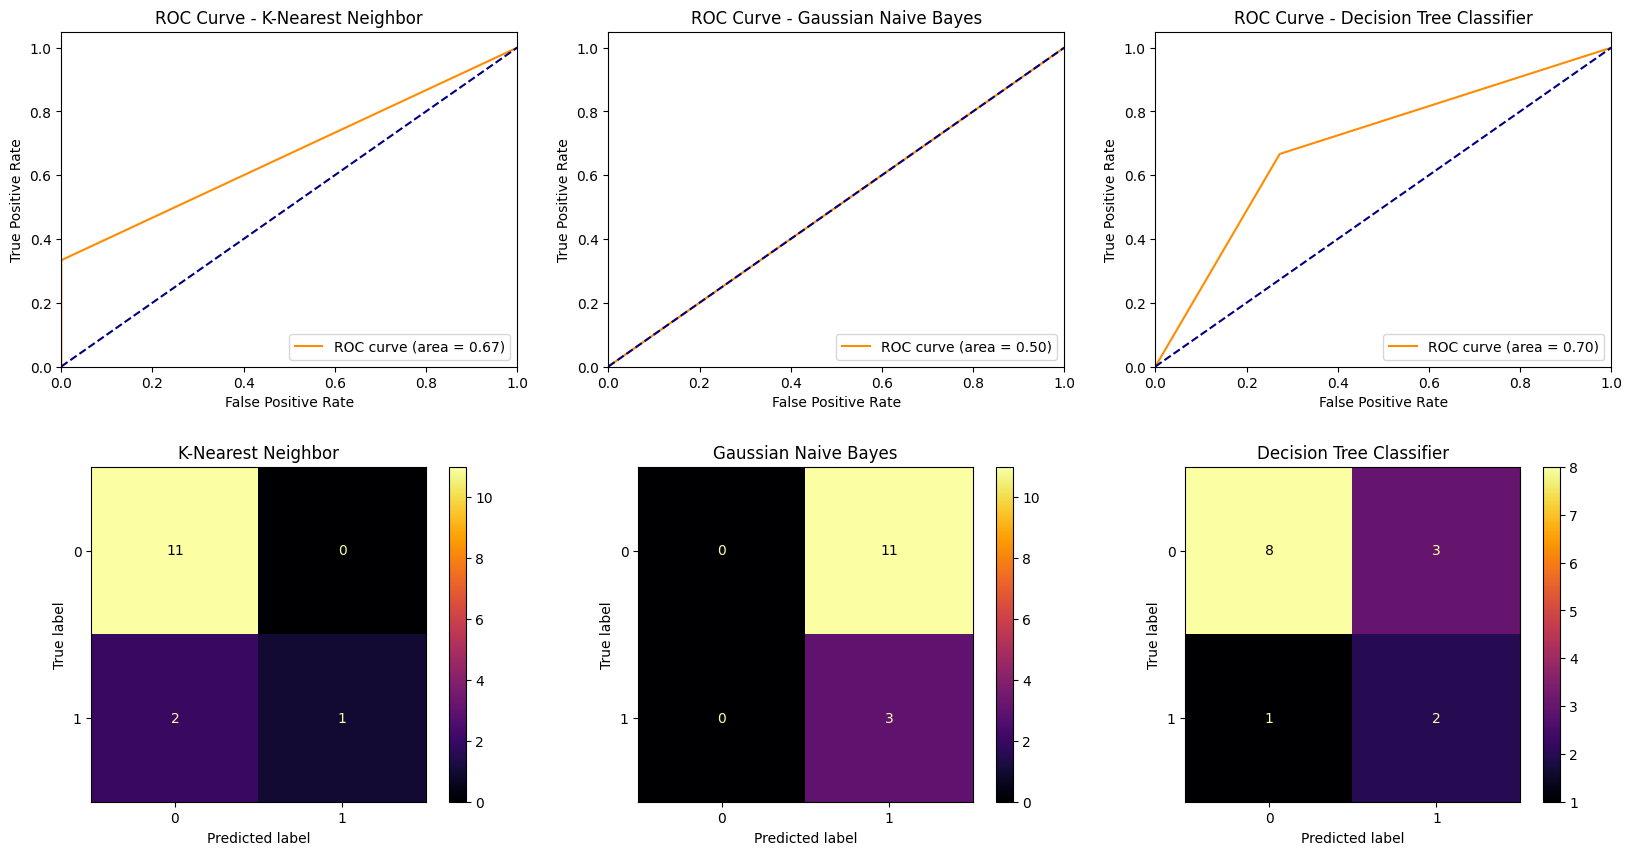

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
K-Nearest Neighbor,85.714286,100.000000,33.333333,66.666667,50.000000
Gaussian Naive Bayes,21.428571,21.428571,100.000000,50.000000,35.294118
Decision Tree Classifier,71.428571,40.000000,66.666667,69.696970,50.000000


In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# buat list model dan nama model
models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

# inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
import numpy as np



# loop untuk setiap model
for i, model in enumerate(models):
    # prediksi target variabel pada data uji
    y_pred = model.predict(x_test_scaled_df)

    # hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # tampilkan kurva roc
    roc_display = axes[0,i].plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0,i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0,i].set_xlim([0.0, 1.0])
    roc_display = axes[0,i].set_ylim([0.0, 1.05])
    roc_display = axes[0,i].set_xlabel('False Positive Rate')
    roc_display = axes[0,i].set_ylabel('True Positive Rate')
    roc_display = axes[0,i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0,i].legend(loc="lower right")

    # tambahkan baris kosong
    fig.subplots_adjust(hspace=0.3)

    # tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1,i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # hitung precision dan recall
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = 2*pr*rc / (pr+rc)

    # simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# tampilkan visualisasi
plt.show()

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)

# tampilkan dataframe
display(df_eval)

Setelah melakukan perbandingan terhadap 3 algoritma yang digunakan untuk melakukan prediksi data, ditemukan bahwa setiap algoritma memiliki keunggulannya masing-masing di setiap sektor. Algoritma K-Nearest Neighbors (KNN) terbukti lebih unggul dalam hal akurasi dan presisi dalam melakukan prediksi data, dengan tingkat akurasi mencapai 85,7% dan tingkat presisi mencapai 100%. Sedangkan algoritma Naive Bayes lebih unggul dalam hal recall dengan mencapai nilai 100%. Sementara itu, algoritma C-45 unggul dalam sektor ROC-AUC dengan nilai 69,69%, dan dalam hal nilai F1 Score, KNN dan C-45 lebih unggul dibandingkan algoritma lainnya. Dengan mempertimbangkan seluruh faktor tersebut, dapat disimpulkan bahwa algoritma KNN merupakan algoritma yang lebih unggul dibandingkan dengan dua algoritma lainnya.

## Deployment

In [51]:


df100.to_csv("Breast Cancer Clean2.csv", index=False)

